**Francis Galton** (1822-1911) developed a mechanical device that would generate a binomial distribution. Watch this short video to see how it works: https://www.youtube.com/watch?v=6YDHBFVIvIs

Use Python to simulate 10,000 balls going through a Galton board with 16 rows of pins. Post a figure showing their final distribution.

RTB wrote it, 01 August 2017, hot summer day listening to Tales from Topographic Oceans


We can think of each row of pins as enforcing a binary decsision with equal probability of the ball turning to the right or the left. So, in essence, this is like flipping a fair coin 16 times and counting the number of heads (or tails). So getting 16 heads would be like the ball making 16 'rightwards' turns.

In [2]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm
import pandas as pd

# Run the simulation

In [3]:
# Constants (would be passed as arguments to a function)
nRowsOfPins = 16
nBalls = 100000

# Simulate the Galton Board
np.random.seed()  # Equivalent to rng shuffle in MATLAB
numRightTurns = np.sum(np.round(np.random.rand(nRowsOfPins, nBalls)), axis=0)

# Plot the histogram

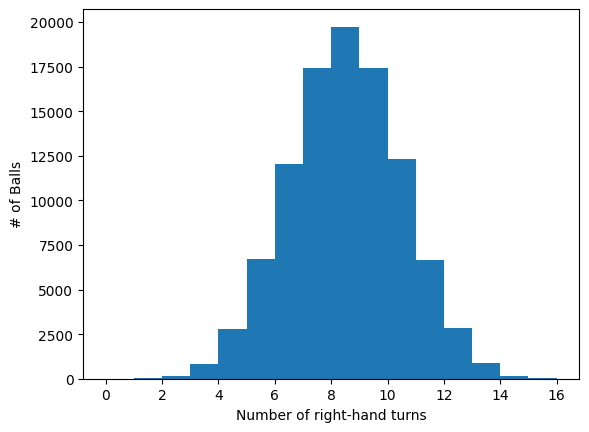

In [4]:
# Plot a histogram
xBins = np.arange(0, nRowsOfPins + 1)  # All possible #s of right-hand turns
binCounts, _ = np.histogram(numRightTurns, bins=xBins)

plt.bar(xBins[:-1], binCounts, width=1, align='edge')
plt.xlabel('Number of right-hand turns')
plt.ylabel('# of Balls')
plt.show()

# Question #1

What is the probability of getting 8 right-hand turns?

In [5]:
# Q1: Binomial probability of getting 8 right-hand turns
x = 8
n = 16
p = 0.5
pBino = binom.pmf(x, n, p)  # Binomial probability
bino_err = 0  # No error for binomial by definition
print(pBino)

0.1963806152343748


# Question #2

Calculate the probability using the normal approximation to the binomial distribution.

In [6]:
# Q2: Normal approximation for the same probability
pNorm = norm.pdf(x, n * p, np.sqrt(n * p * (1 - p)))  # Normal approximation
norm_err = (abs(pNorm - pBino) / pBino) * 100  # Error for normal approximation
print(pNorm)

0.19947114020071635


## Question #3

Calculate the probability based on your simlulation.

In [7]:
# Q5: Simulation probability for 8 right-hand turns
pSim = np.sum(numRightTurns == x) / nBalls  # Simulation probability
sim_err = (abs(pSim - pBino) / pBino) * 100  # Error for simulation
print(pSim)

0.19735


# Display a table of your results.

In [8]:
# Display results in a table
data = {'Probability': [pBino, pNorm, pSim], '% Error': [bino_err, norm_err, sim_err]}
index = ['Binomial', 'Normal', 'Simulation']
df = pd.DataFrame(data, index=index)
print(df)

            Probability   % Error
Binomial       0.196381  0.000000
Normal         0.199471  1.573742
Simulation     0.197350  0.493625
